<a href="https://colab.research.google.com/github/HeHeHuang/DeepLearningNLP/blob/main/01_NN_regressiong_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.8.2


## createing data to view and fit

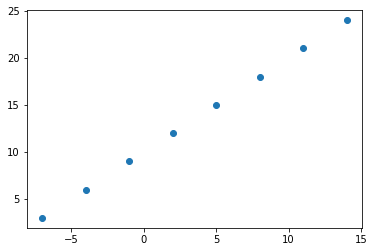

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(X,y)

In [8]:
y == X+ 10 

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input & Output Shape

In [33]:
tf.random.set_seed(42)
X = tf.constant(tf.cast(X,dtype=tf.float32))
y = tf.constant(tf.cast(y,dtype=tf.float32))
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [30]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [13]:
input_shape = X[0].shape
input_shape

TensorShape([])

In [24]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

as you can see here, the x is scalar , y is scalar
> there is no shape, how we build the input shape

## steps in modelling with Tensorflow

* create model: sequential: input layer, output layer, hidden layer 
* compile model: loss function, optimizer, evaluation matric
* fit model: epochs 



> two way to create Sequential() 

In [37]:
 
# create model 
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)


# compile model:
model.compile(
    loss = tf.keras.losses.mae,
    optimizer =tf.keras.optimizers.SGD(),
    metrics=['mae'])


# fit data to model
#model.fit(X,y, epochs = 5 )    #"dense_9" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 517ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919


In [43]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [44]:
model.predict([17.0])

array([[14.089865]], dtype=float32)

#### Problem in input shape 

**NOTE:**  
there is problem that: pass X is less dim for the layers. 
> Use the expand_dims to add dimension, axis means which dimension you want to add 

In [41]:
X_more_dims = tf.expand_dims(X,axis=-1)
X

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>

In [40]:
X_more_dims

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]], dtype=float32)>

## Improve model
> if we use the model we build and predict. the value is wrong. seems the NN didnt find the current pattern 



* **Create model:** more complex model: more hidden layer or more neurons, different activation function
* **Compile model:** use different optimizer, lower learning rate of optimization function 
* **Fit data to model:**  increase epochs (more time to learning) or more data to learning

In [ ]:
#### Increase epochs

In [45]:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mae: 10.5594
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 10.4269 - mae: 10.4269
Epoch 3/200
1/1 [==============================] - 0s 17ms/step - loss: 10.2944 - mae: 10.2944
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 10.1619 - mae: 10.1619
Epoch 5/200
1/1 [==============================] - 0s 15ms/step - loss: 10.0294 - mae: 10.0294
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 9.8969 - mae: 9.8969
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 9.7644 - mae: 9.7644
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 9.6319 - mae: 9.6319
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 9.4994 - mae: 9.4994
Epoch 10/200
1/1 [==============================] - 0s 7ms/step - loss: 9.3669 - mae: 9.3669
Epoch 11/200
1/1 [==============================] - 0s 8ms/ste

In [46]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [48]:
model.predict([17])  #  more close to 27 

array([[30.527359]], dtype=float32)

### improvement in creating model 

In [58]:
#create model 
model_1 = tf.keras.Sequential([    # the layers between input layer and output layer will hidden layer
    tf.keras.layers.Dense(10),     # add hidden layers wit 10 neurous                       
    tf.keras.layers.Dense(1,activation='relu') # add activation function                            
])
#model compile
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)
#model fitting 
model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 340ms/step - loss: 12.1896 - mae: 12.1896
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 11.1966 - mae: 11.1966
Epoch 3/200
1/1 [==============================] - 0s 15ms/step - loss: 10.1854 - mae: 10.1854
Epoch 4/200
1/1 [==============================] - 0s 15ms/step - loss: 9.1456 - mae: 9.1456
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 8.0671 - mae: 8.0671
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 6.9390 - mae: 6.9390
Epoch 7/200
1/1 [==============================] - 0s 13ms/step - loss: 5.7502 - mae: 5.7502
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 4.7676 - mae: 4.7676
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 4.6435 - mae: 4.6435
Epoch 10/200
1/1 [==============================] - 0s 7ms/step - loss: 4.6545 - mae: 4.6545
Epoch 11/200
1/1 [==============================] - 0s 6ms/step 

In [59]:
model_1.predict([17])

array([[30.312168]], dtype=float32)

### imporvement in model compile & model fitting


In [65]:
#create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)                           
]) 
#model compile
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.1),  # change the Adam & learning rate
    metrics = tf.keras.metrics.mae
)
#model fitting
model_2.fit(tf.expand_dims(X,axis=-1),y,epochs=200) # increase the epochs that model can learning more times

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 629ms/step - loss: 13.1351 - mean_absolute_error: 13.1351
Epoch 2/200
1/1 [==============================] - 0s 13ms/step - loss: 10.3289 - mean_absolute_error: 10.3289
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 7.6250 - mean_absolute_error: 7.6250
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 5.0434 - mean_absolute_error: 5.0434
Epoch 5/200
1/1 [==============================] - 0s 22ms/step - loss: 3.7138 - mean_absolute_error: 3.7138
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 4.4931 - mean_absolute_error: 4.4931
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 5.0261 - mean_absolute_error: 5.0261
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 5.0372 - mean_absolute_error: 5.0372
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 4.6260 - mean_absolute_error: 4.6260
Epoch 10/200
1/1 [==========

In [66]:
model_2.predict([17.0])

array([[27.69628]], dtype=float32)